<h2>602 Homework 3<h2>

# Part 1)
- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes).
- Use box plots to look at the data. 
- Create a training and test set (with shuffling).
- Train a decision tree classifier using the training set.
- What are the top 5 most important (discriminative) features?
- Train a logistic regression model using the training set.
- Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.

In [1]:
import pandas as pd                         #Importing libraries
import numpy as np
from sklearn import datasets
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn import tree as tr
import itertools

In [2]:
data = datasets.load_breast_cancer()                 #loading dataset

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
breastcancer_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
display(breastcancer_df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


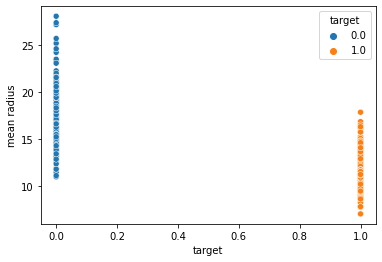

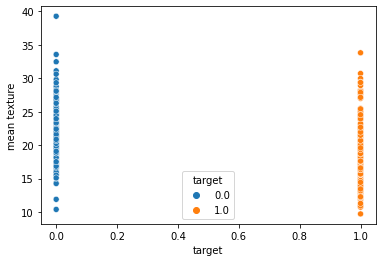

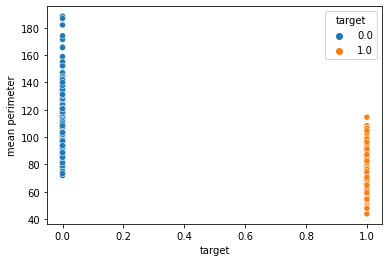

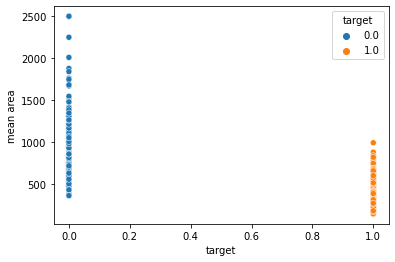

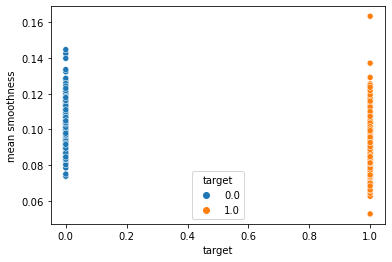

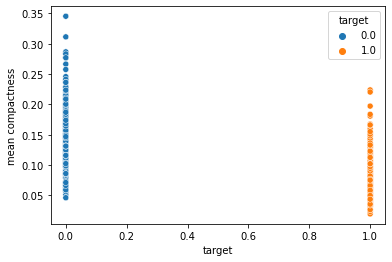

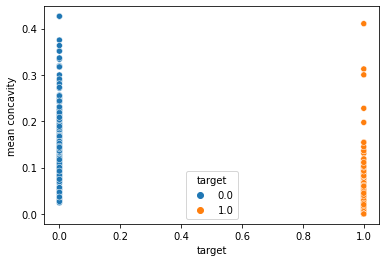

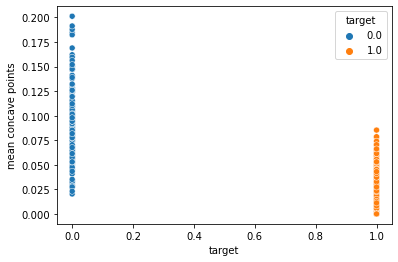

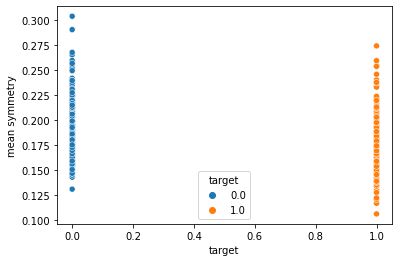

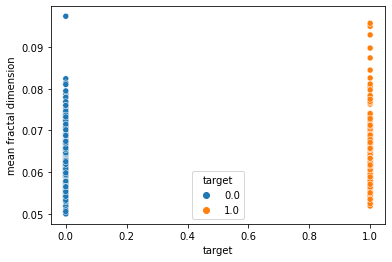

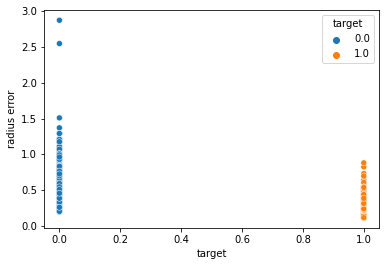

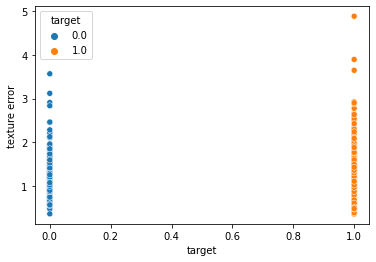

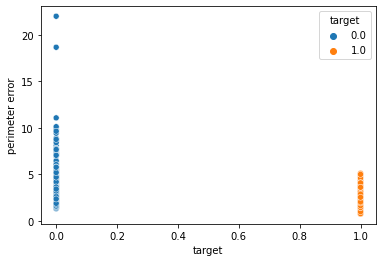

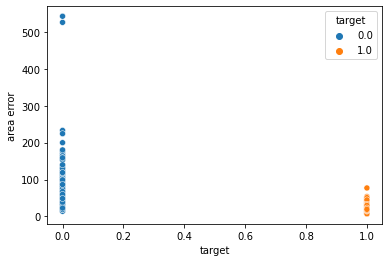

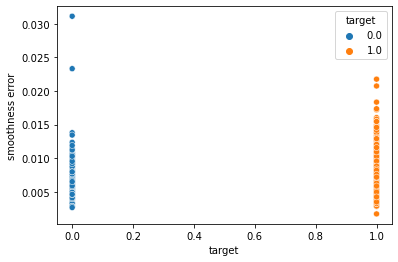

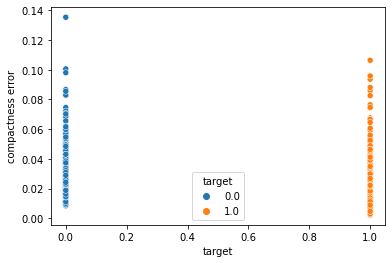

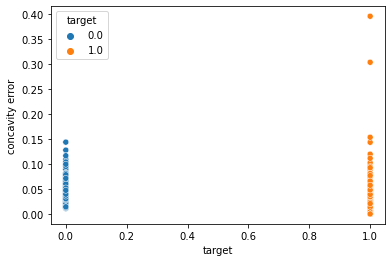

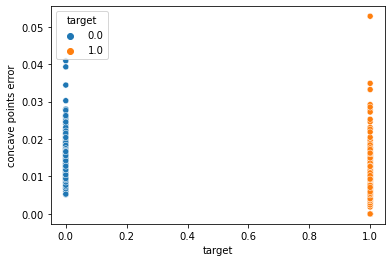

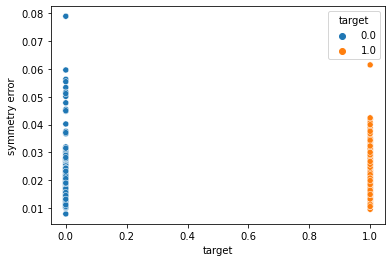

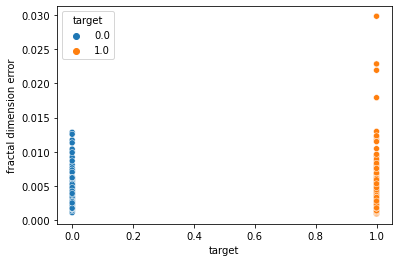

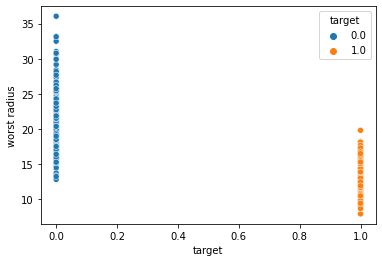

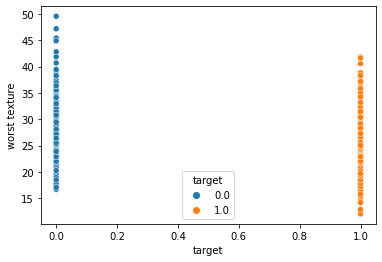

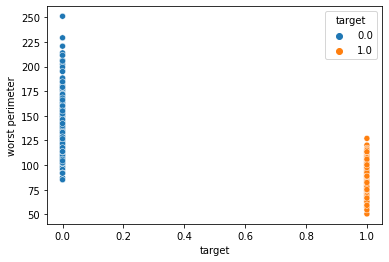

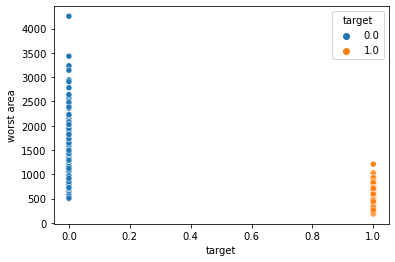

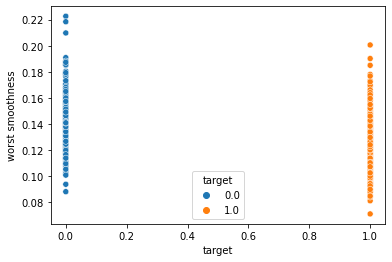

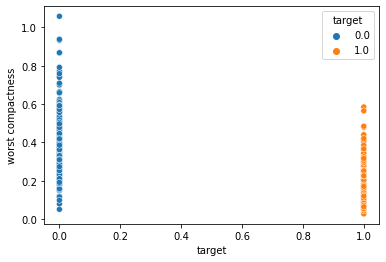

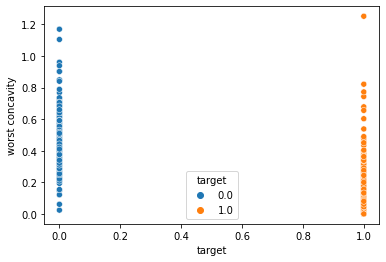

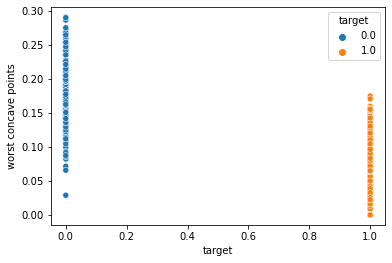

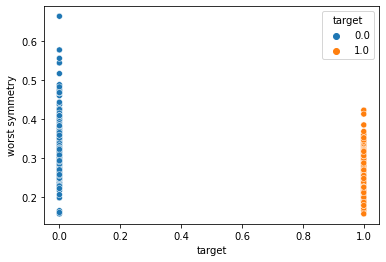

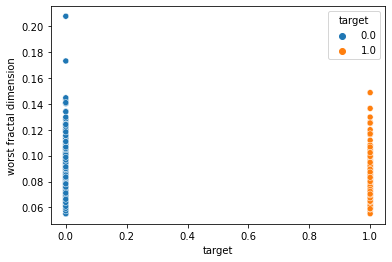

In [5]:
#Plotting scatter plot for all the columns vs target at a time using for loop
for column in breastcancer_df.columns:
    if column != 'target':
        sns.scatterplot(data=breastcancer_df,x="target",y = column, hue="target")
        plt.show()

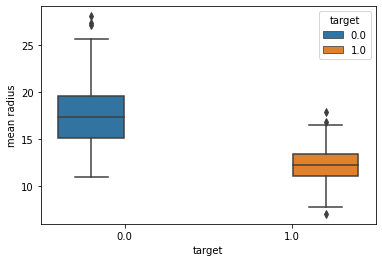

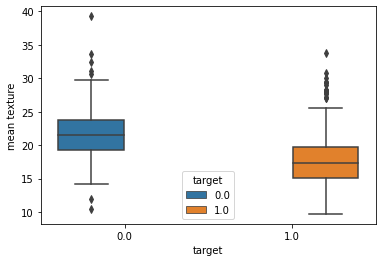

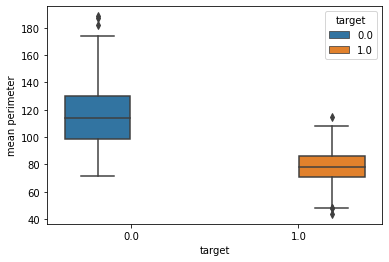

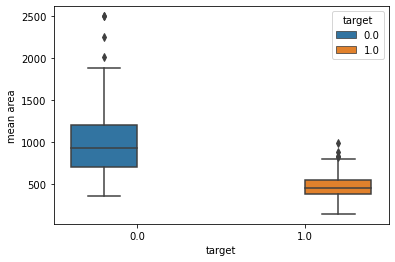

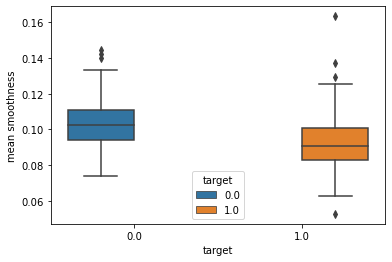

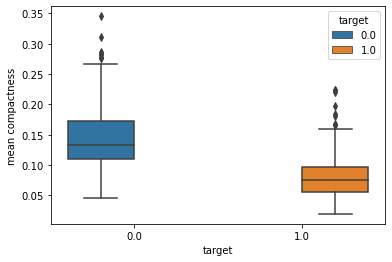

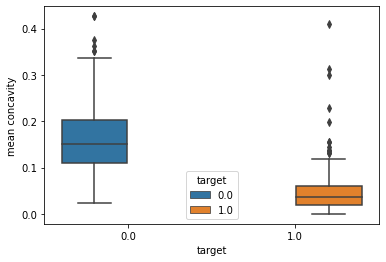

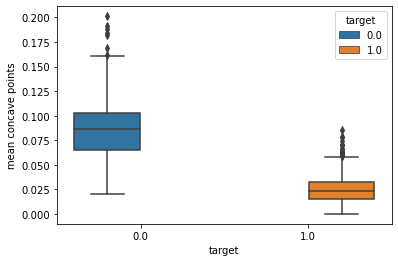

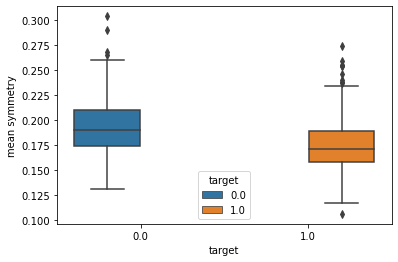

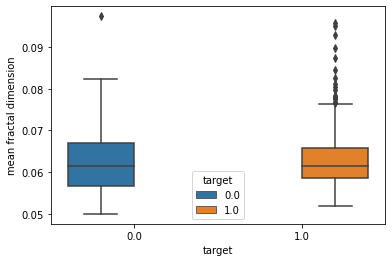

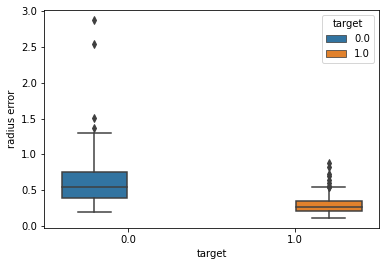

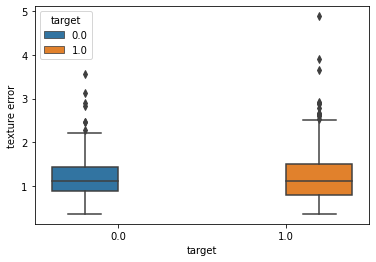

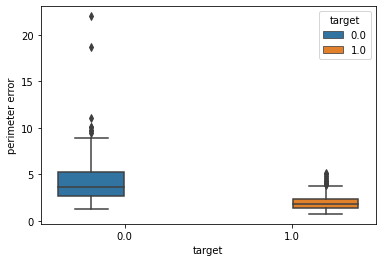

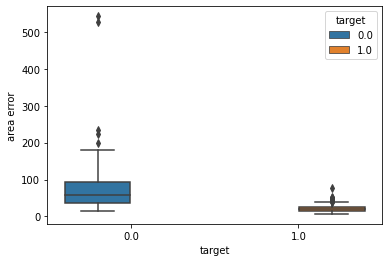

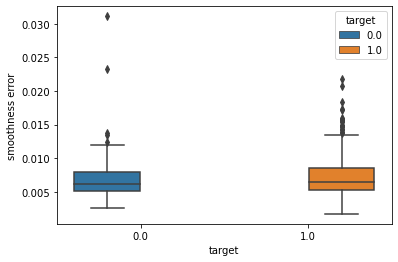

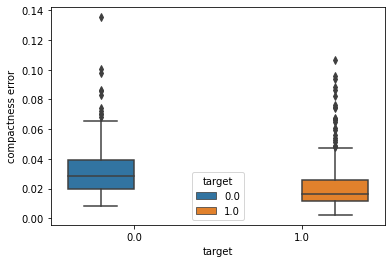

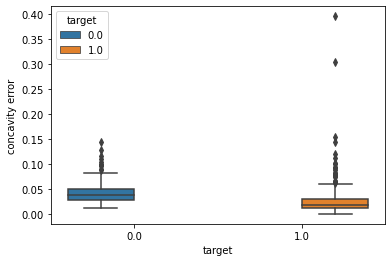

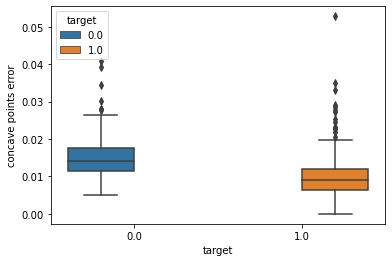

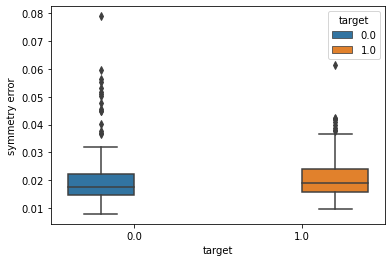

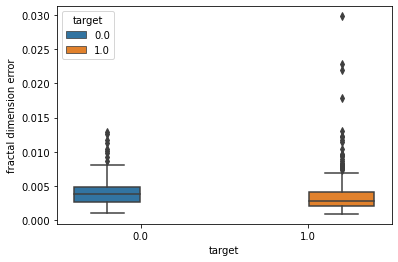

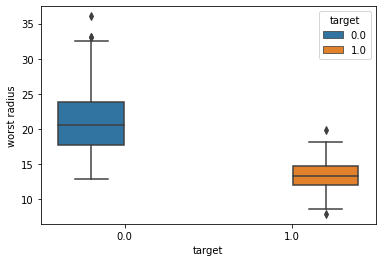

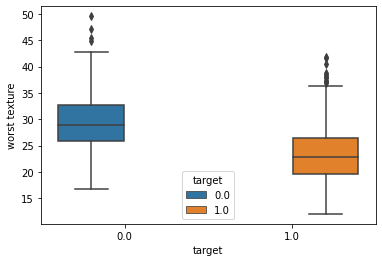

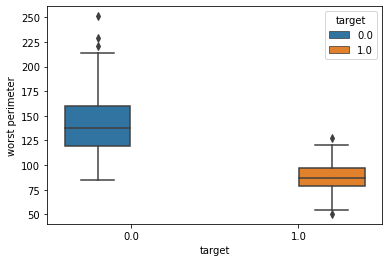

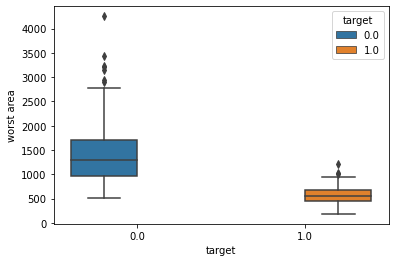

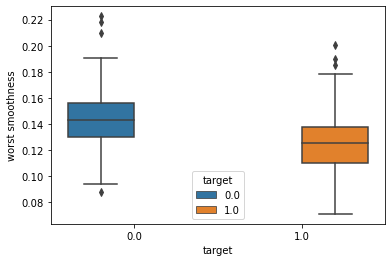

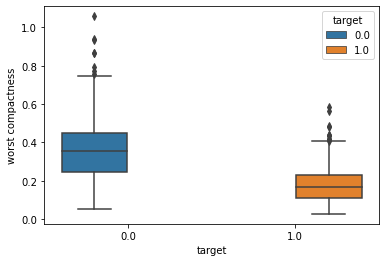

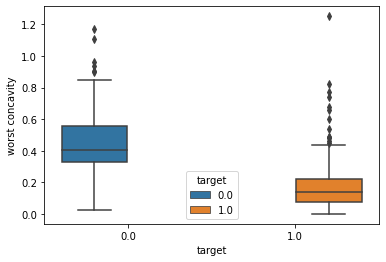

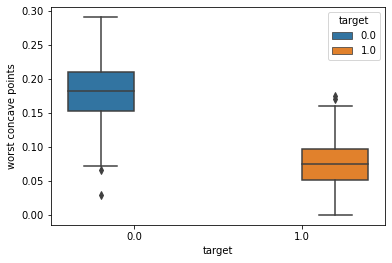

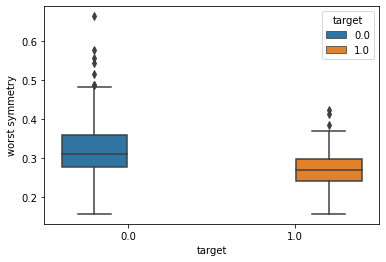

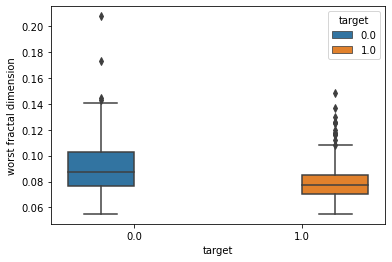

In [6]:
#Plotting box plot for all the columns vs target at a time using for loop
for column in breastcancer_df.columns:
    if column != 'target':
        sns.boxplot(data=breastcancer_df,x="target",y = column, hue="target")
        plt.show()
    

In [7]:
#shuffling the dataset and splitting the dataset
breastcancer_df_shuffled = shuffle(breastcancer_df)

x_train,x_test,y_train,y_test = train_test_split(breastcancer_df_shuffled.drop(['target'],axis=1),breastcancer_df_shuffled.target,test_size=0.3)
#X_train, X_test, y_train, y_test = train_test_split(data.data[:,0:9],data.target,shuffle=True,test_size=0.3)

In [8]:
classifer_data = DecisionTreeClassifier(criterion="entropy")
classifer_data.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

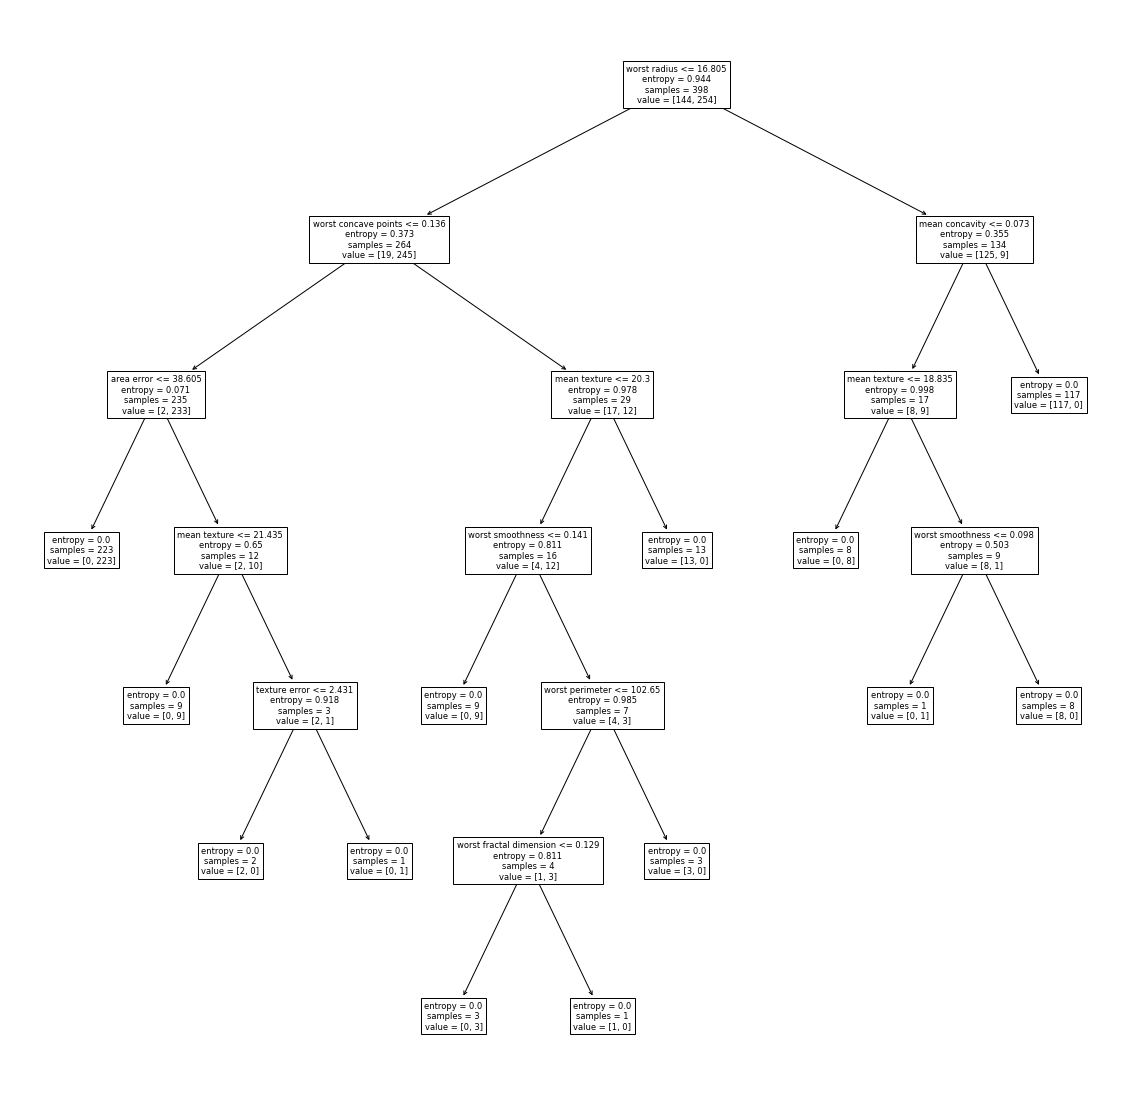

In [9]:

plt.figure(figsize=(20,20))
tr.plot_tree(classifer_data, feature_names=breastcancer_df.columns)
plt.show()

In [10]:
#Filtering the top 5 featers from the dataset
filtered = list(zip(classifer_data.feature_importances_,breastcancer_df.columns))
filtered.sort(reverse=True)
print("Top 5 features of the dataset are:\n")
for x in filtered[0:5]:
    print(x[1])

Top 5 features of the dataset are:

worst radius
worst concave points
mean texture
mean concavity
worst smoothness


In [11]:
#finding LR model 
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\sanat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
#Finding the scores for LR model and DT model
LR_score=lr.score(x_test,y_test)
DT_score= classifer_data.score(x_test,y_test)            
print("logistic regression model score:" + str(LR_score))
print("\nDecesion tree model score:" + str(DT_score))

logistic regression model score:0.9590643274853801

Decesion tree model score:0.9649122807017544


From above values we can say that LR model performed better on this test set

### Part 2)

- Use the provided *winequality_white.csv* as your data. Last column (quality) is the target variable.
- Do not forget to shuffle and split (Train/test) your data.
- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.

In [13]:
data1 = pd.read_csv('winequality_white.csv',sep=';')           #loading the given dataset

In [14]:
data1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [15]:
data1=shuffle(data1)                #shuffling the dataset

In [16]:
x= data1.drop(['quality'], axis=1)                     #setting the target and features
y = data1['quality']

In [17]:
#Splitting the shuffeled dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=1)
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3645,5.9,0.18,0.28,5.10,0.039,50.0,139.0,0.99165,3.16,0.44,11.3
3823,6.7,0.26,0.49,8.10,0.052,48.0,197.0,0.99558,3.19,0.48,9.5
2984,6.9,0.30,0.30,10.55,0.037,4.0,28.0,0.99184,3.07,0.32,12.7
3616,7.7,0.32,0.61,11.80,0.041,66.0,188.0,0.99794,3.00,0.54,9.3
3170,7.6,0.17,0.46,0.90,0.036,63.0,147.0,0.99126,3.02,0.41,10.7
...,...,...,...,...,...,...,...,...,...,...,...
1915,7.2,0.36,0.36,5.70,0.038,26.0,98.0,0.99140,2.93,0.59,12.5
2141,7.7,0.28,0.35,15.30,0.056,31.0,117.0,0.99980,3.27,0.50,9.6
2158,7.4,0.18,0.27,1.30,0.048,26.0,105.0,0.99400,3.52,0.66,10.6
1531,8.1,0.30,0.49,8.10,0.037,26.0,174.0,0.99430,3.10,0.30,11.2


In [18]:
classifer_data = DecisionTreeClassifier(criterion="entropy")
classifer_data.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
#Finding DT for some particular values
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_split=10)
tree_reg.fit(x_test,y_test)

DecisionTreeRegressor(max_depth=10, min_samples_split=10)

In [20]:
#performing DT for variable depth and sample values and finding the MSE for best values

max_depths = [2, 3, 4, 5, 6, 7, 8, 10]
min_samples_split = [3,4,5,7,9]
depth_sample = list(itertools.product(max_depths,min_samples_split))
scores = np.zeros(len(depth_sample))
i=0

for combinations in depth_sample:
    tree_reg = DecisionTreeRegressor(max_depth=combinations[0],min_samples_split=combinations[1])
    tree_reg.fit(x_train,y_train)
    score=tree_reg.score(x_test, y_test)
    scores[i]=score
    i+=1

scores_comb = list(zip(depth_sample,scores))
scores_comb.sort(reverse=True)
best_comb=scores_comb[0][0]
print("best max_depths value:" + str(best_comb[0]))
print("best min_samples_split value:" + str(best_comb[1]))

tree_reg = DecisionTreeRegressor(max_depth=combinations[0], min_samples_split=combinations[1])
tree_reg.fit(x_train,y_train)
y_predict=tree_reg.predict(x_test)
print("\nMSE for the best values of test set:" + str(mean_squared_error(y_predict,y_test )))

best max_depths value:10
best min_samples_split value:9

MSE for the best values of test set:0.5971824601471055
